In [14]:
import numpy as np
import pandas as pd
import numpy as np
import math

In [1]:
height = [1.735,1.795,1.832,1.86,1.92,1.772,1.97,1.87,1.59,1.79,2.03]
month = [5,10,9,1,11,9,5,11,5,10,10]
number = [8,1,6,0,7,8,1,3,7,2,1]

In [2]:


# Построение таблицы частот
data = pd.DataFrame({'month': month, 'number': number})

# Вариационный ряд и абсолютные частоты
frequency_table = data['number'].value_counts().sort_index()
print(frequency_table)
frequency_table_for_month = data['month'].value_counts().sort_index()

# Относительные частоты
relative_frequencies = frequency_table / len(data)
relative_frequencies_for_month = frequency_table_for_month / len(data)
# Таблица частот
frequency_distribution = pd.DataFrame({
    'Absolute Frequency': frequency_table,
    'Relative Frequency': relative_frequencies
})

frequency_distribution_for_month = pd.DataFrame({
    'Absolute Frequency': frequency_table_for_month,
    'Relative Frequency': relative_frequencies_for_month
})
frequency_distribution

number
0    1
1    3
2    1
3    1
6    1
7    2
8    2
Name: count, dtype: int64


,Absolute Frequency,Relative Frequency
number,,
0,1,0.090909
1,3,0.272727
2,1,0.090909
3,1,0.090909
6,1,0.090909
7,2,0.181818
8,2,0.181818


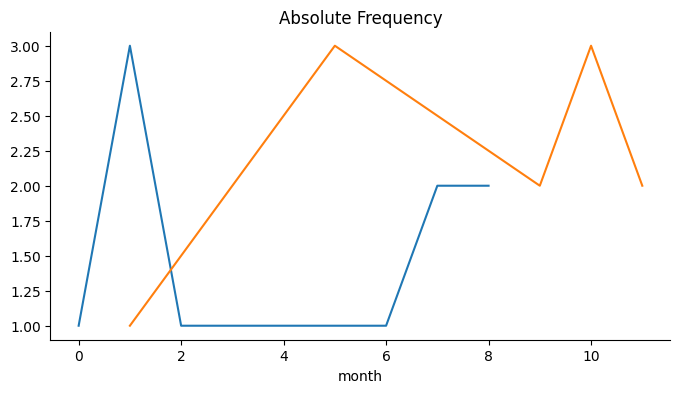

In [3]:
from matplotlib import pyplot as plt
frequency_distribution['Absolute Frequency'].plot(kind='line', figsize=(8, 4), title='Absolute Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
frequency_distribution_for_month['Absolute Frequency'].plot(kind='line', figsize=(8, 4), title='Absolute Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)


number
0    0.090909
1    0.363636
2    0.454545
3    0.545455
6    0.636364
7    0.818182
8    1.000000
Name: count, dtype: float64


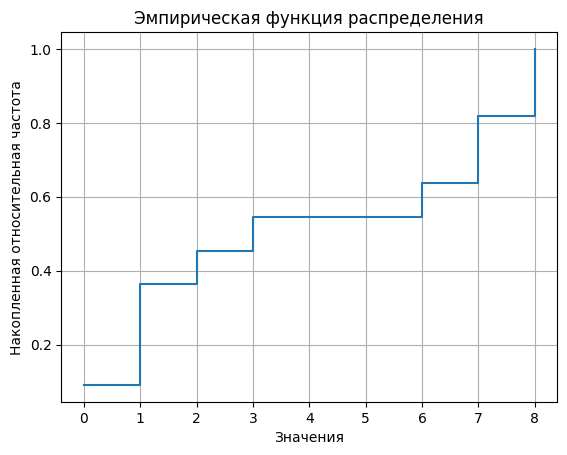

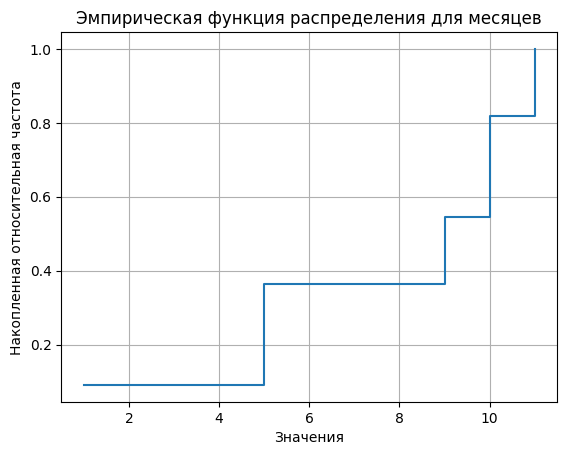

In [4]:
# Вычисление эмпирической функции распределения
empirical_distribution = relative_frequencies.cumsum()
print(empirical_distribution)
empirical_distribution_for_month = relative_frequencies_for_month.cumsum()

# График эмпирической функции распределения
plt.step(empirical_distribution.index, empirical_distribution, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

#График эмпирической функции распределения для месяца
plt.step(empirical_distribution_for_month.index, empirical_distribution_for_month, where='post')
plt.title('Эмпирическая функция распределения для месяцев')
plt.xlabel('Значения')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

In [5]:
# Выборочное среднее
mean_value = data['number'].mean()

# Выборочная дисперсия
variance = data['number'].var(ddof=1)

# Выборочное стандартное отклонение
std_deviation = data['number'].std(ddof=1)

# Выборочная медиана
median_value = data['number'].median()

# Коэффициент вариации
coefficient_of_variation = (std_deviation / mean_value) * 100

mean_value, variance, std_deviation, median_value, coefficient_of_variation

(4.0, 10.2, 3.1937438845342623, 3.0, 79.84359711335655)

In [13]:
# Данные
height = [1.735,1.795,1.832,1.86,1.92,1.772,1.97,1.87,1.59,1.79,2.03]

# Число наблюдений
n = len(height)

# Число интервалов по правилу Стёрджесса
m = math.ceil(1 + 3.322 * math.log10(n))
m

5

In [7]:
# Минимальное и максимальное значения
min_value = min(height)
max_value = max(height)

# Ширина интервала
interval_width = (max_value - min_value) / m

# Границы интервалов
intervals = [min_value + i * interval_width for i in range(m + 1)]
intervals

[1.59, 1.678, 1.766, 1.8539999999999999, 1.9419999999999997, 2.03]

In [8]:
# Построение вариационного ряда
frequency_distribution = np.histogram(height, bins=intervals)
absolute_frequencies = frequency_distribution[0]
interval_edges = frequency_distribution[1]

# Относительные частоты
relative_frequencies = absolute_frequencies / n

# Вариационный ряд
frequency_table = pd.DataFrame({
    'Interval': [f"{interval_edges[i]} - {interval_edges[i+1]}" for i in range(m)],
    'Absolute Frequency': absolute_frequencies,
    'Relative Frequency': relative_frequencies
})

frequency_table

,Interval,Absolute Frequency,Relative Frequency
0,1.59 - 1.678,1,0.090909
1,1.678 - 1.766,1,0.090909
2,1.766 - 1.8539999999999999,4,0.363636
3,1.8539999999999999 - 1.9419999999999997,3,0.272727
4,1.9419999999999997 - 2.03,2,0.181818


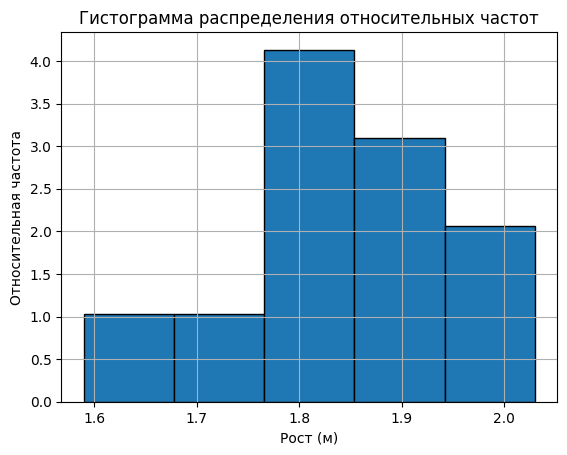

In [9]:
import matplotlib.pyplot as plt

# Построение гистограммы относительных частот
plt.hist(height, bins=intervals, density=True, edgecolor='black')
plt.title('Гистограмма распределения относительных частот')
plt.xlabel('Рост (м)')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

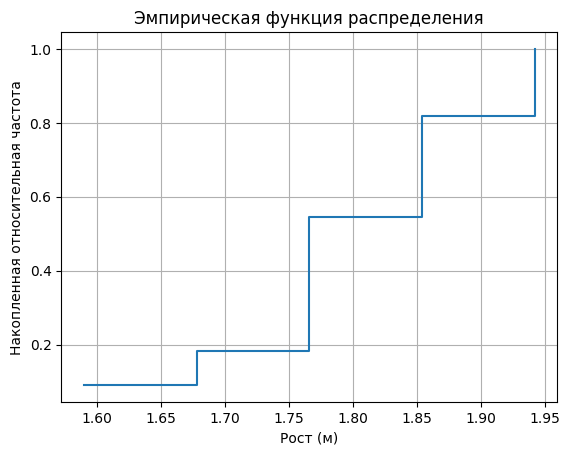

In [10]:
# Вычисление эмпирической функции распределения
empirical_distribution = np.cumsum(relative_frequencies)

# График эмпирической функции распределения
plt.step(interval_edges[:-1], empirical_distribution, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Рост (м)')
plt.ylabel('Накопленная относительная частота')
plt.grid(True)
plt.show()

In [11]:
# Выборочное среднее
mean_value = np.mean(height)

# Выборочная дисперсия
variance = np.var(height, ddof=1)

# Выборочное стандартное отклонение
std_deviation = np.std(height, ddof=1)

# Выборочная медиана
median_value = np.median(height)

# Коэффициент вариации
coefficient_of_variation = (std_deviation / mean_value) * 100

mean_value, variance, std_deviation, median_value, coefficient_of_variation

(1.8330909090909093,
 0.014291290909090893,
 0.11954618734652683,
 1.832,
 6.521563483494322)